<a href="https://colab.research.google.com/github/Mhmdaris15/Handwritten-Digit-Classification/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras.models import load_model
from google.colab import files
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [ ]:
files = files.upload()

Saving mnist_simple_cnn.h5 to mnist_simple_cnn.h5


In [ ]:
classifier = load_model('./mnist_simple_cnn.h5')

In [ ]:
(x_train, x_test), (y_train, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10


In [ ]:
# Training Parameters
batch_size = 128
epochs = 3

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), 
                 strides=2, activation='relu', 
                 input_shape=input_shape))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Accuracy Score :', score[1])
print('Loss Score :', score[0])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

[0.3070535361766815, 0.10032198578119278, 0.07587806135416031]
[0.06364186108112335, 0.0395541712641716, 0.034912966191768646]
range(1, 4)


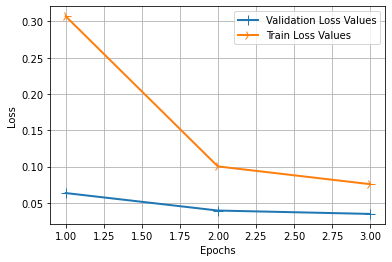

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
print(loss_values)
print(val_loss_values)
print(epochs)

line1 = plt.plot(epochs, val_loss_values, label='Validation Loss Values')
line2 = plt.plot(epochs, loss_values, label='Train Loss Values')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

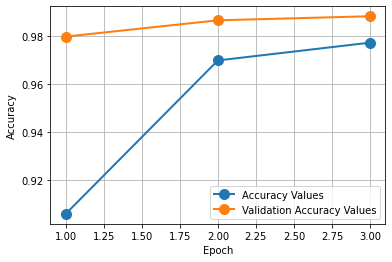

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
line1 = plt.plot(epochs, acc_values, label='Accuracy Values')
line2 = plt.plot(epochs, val_acc_values, label='Validation Accuracy Values')
plt.setp(line1, linewidth=2, marker='o', markersize=10)
plt.setp(line2, linewidth=2, marker='o', markersize=10)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import load_model, Sequential
from keras.layers import Dense, MaxPooling2D, Dropout, Flatten, Conv2D

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.size)
print(x_test.size)

47040000
7840000


In [ ]:
# (Number of data, Rows, Columns)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32') / 255


In [ ]:
# Just Run Once. Don't more !
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [ ]:
num_classes = y_train.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
input_shape = (x_train.shape[1], x_train.shape[2], 1)
print(num_classes)
print(num_pixels)
print(input_shape)

10
784
(28, 28, 1)


In [ ]:
Epoch = 3
Batch_size = 128

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(5,5), strides=1, activation=keras.activations.relu))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation=keras.activations.softmax))
model.compile(optimizer=keras.optimizers.SGD(0.05), loss=keras.losses.CategoricalCrossentropy(), metrics=keras.metrics.Accuracy())
print(model.summary())
trained = model.fit(x_train, y_train, batch_size=Batch_size, epochs=Epoch, verbose=1, validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0) 
print('Loss Score :', scores[0], '\nAccuracy Score :', scores[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
epochs = range(1, Epoch + 1)
trained_dict = trained.history
loss_value = trained_dict['loss']
val_loss = trained_dict['val_loss']
acc_value = trained_dict['accuracy']
val_acc = trained_dict['val_accuracy']

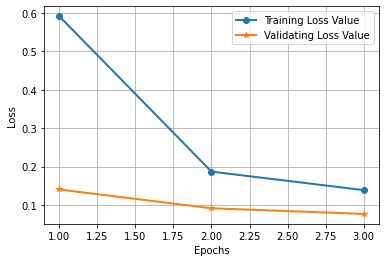

In [ ]:
line1 = plt.plot(epochs, loss_value, label = 'Training Loss Value')
line2 = plt.plot(epochs, val_loss, label = 'Validating Loss Value')
plt.setp(line1, linewidth=2.0, marker='o')
plt.setp(line2, linewidth=2.0, marker='*')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

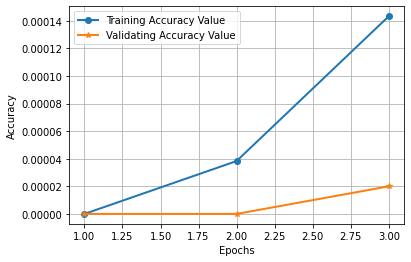

In [ ]:
line1 = plt.plot(epochs, acc_value, label = 'Training Accuracy Value')
line2 = plt.plot(epochs, val_acc, label = 'Validating Accuracy Value')
plt.setp(line1, linewidth=2.0, marker='o')
plt.setp(line2, linewidth=2.0, marker='*')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save('my_model.h5')

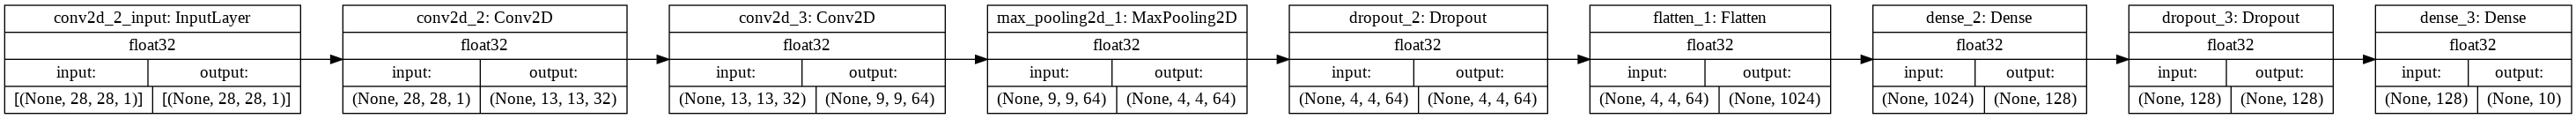

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='My Mnist Model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='LR')

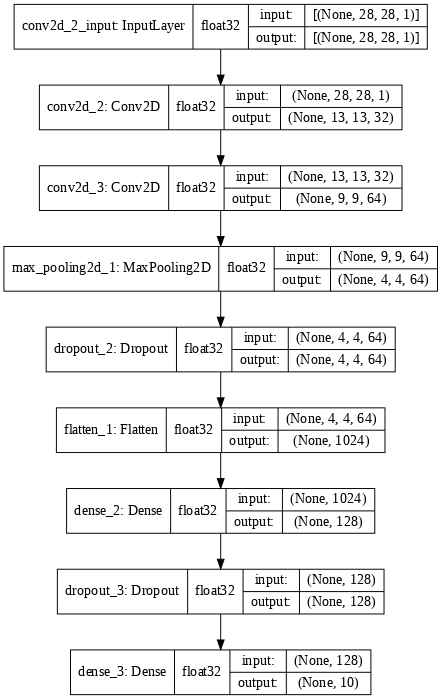

In [ ]:
plot_model(model, to_file='My Mnist Model(2).png', show_shapes=True, show_dtype=True, show_layer_names=True, dpi=70)